## Классификация с помощью KNN. Кластеризация K-means

#### Задание 1. 
К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

#### Задание 2.
К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

#### Задание 3.
Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn import model_selection
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

warnings.filterwarnings('ignore')

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

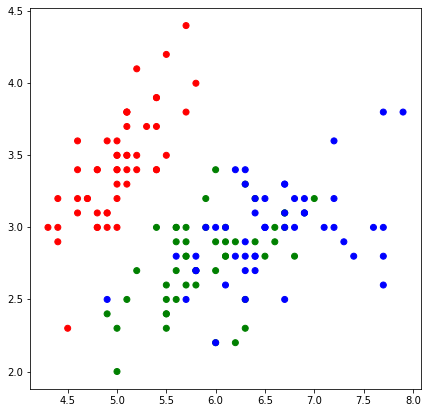

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
def knn(x_train, y_train, x_test, k, weights):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        i = 1
        for d in sorted(test_distances)[0:k]:
            if weights == 'neighbor':
                classes[d[1]] += (k + 1 - i) / k
            if weights == 'distance':
                w = 0.9 ** d[0]
                classes[d[1]] += w
            i += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [25]:
def get_graph(X_train, y_train, k, weights):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, weights)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"kNN при k = {k}, accuracy = {accuracy(y_pred, y_test):.3f}, weights = {weights}")
    plt.show()

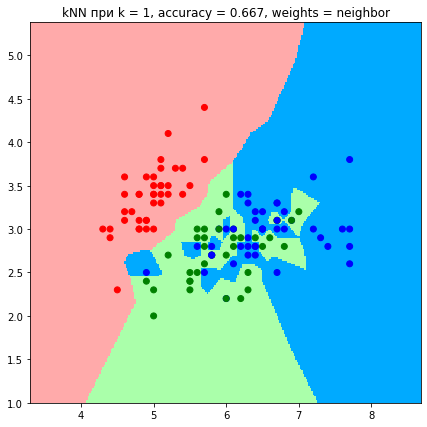

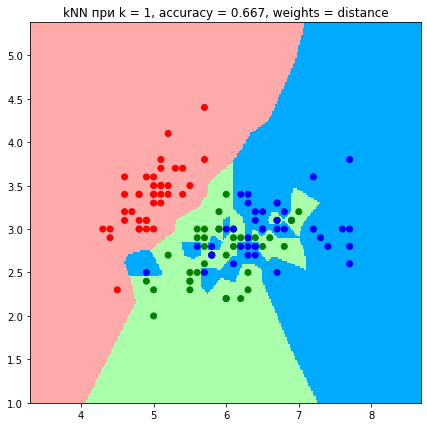

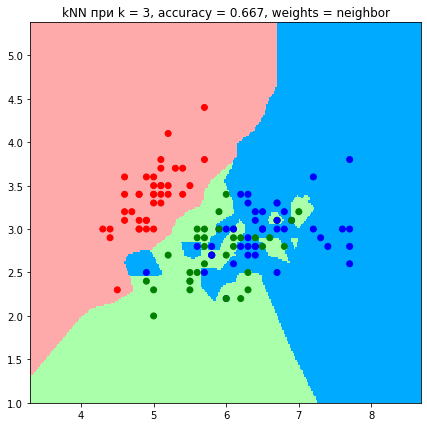

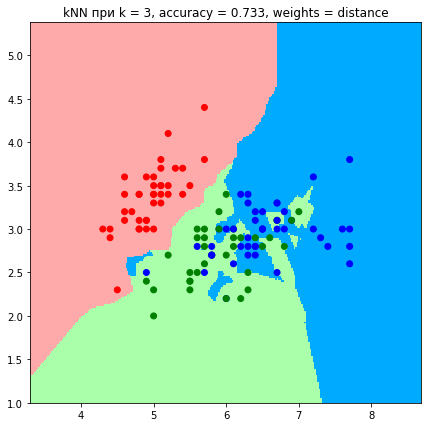

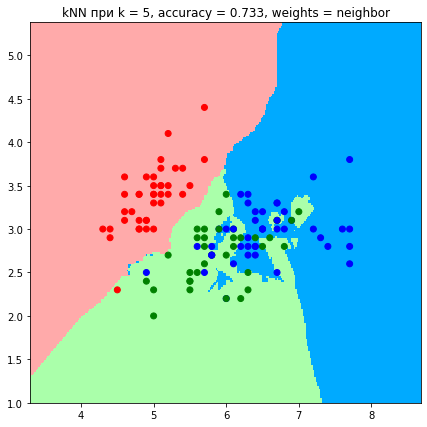

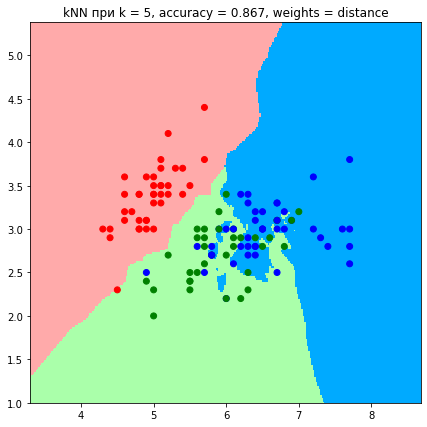

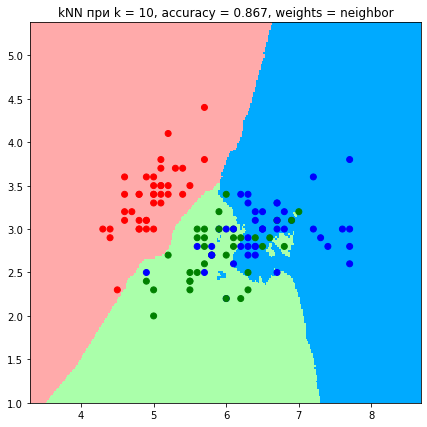

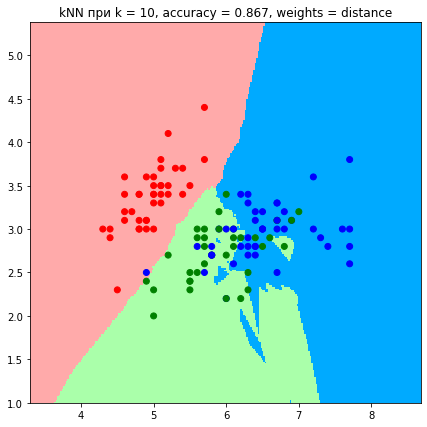

In [29]:
k_list = [1, 3, 5, 10]
weights_list = ['neighbor', 'distance']

for i in k_list:
    for weight in weights_list:
        y_pred = knn(X_train, y_train, X_test, i, weight)
        get_graph(X_train, y_train, i, weight)

Точность у обоих алгоритмов практически одинакова, за исключением k = 3 и 5. С увеличением k сложность гиперплоскости растет, но после начинает уменьшаться, первый алгоритм на графиках выглядит неурезанный, без резких линий и отдельных частей. Оптимальное значение числа соседей для моделей k = 5. 